In [2]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\FraudDetectionData.csv")

In [3]:
df.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0


## Class Imbalance

In [ ]:
# Map the values in the isFraud column to Non-Fraud and Fraud
df["isFraud"] = df["isFraud"].map({0: "Non-Fraud", 1: "Fraud"})

In [ ]:
# Get the value counts of the isFraud column
counts = df['isFraud'].value_counts().rename_axis('isFraud').reset_index(name='count')
counts

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot the count of Non-Fraud and Fraud using a barplot
plt.figure(figsize=(5.5, 5.5))
sns.barplot(x='isFraud', y='count', data=counts, color='pink', edgecolor ="b")
plt.title('Count of Non-Fraudulent & Fraudulent Transactions')
plt.show()

In [ ]:
df["isFraud"] = df["isFraud"].replace({"Non-Fraud": 0, "Fraud": 1})

In [ ]:
print(df["isFraud"].unique())

## Feature Encoding on entire dataset 

In [ ]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
# Creating a instance of label Encoder.
le = LabelEncoder()
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['type'])
# printing label
label
# removing the column 'type' from df
# as it is of no use now.
df.drop("type", axis=1, inplace=True)
# Appending the array to our dataFrame
# with column name 'type'
df["type"] = label
# printing Dataframe
#df

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['nameDest'])
label
df.drop("nameDest", axis=1, inplace=True)
df["nameDest"] = label
#df

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['nameOrig'])
label
df.drop("nameOrig", axis=1, inplace=True)
df["nameOrig"] = label
#df

# Split into train, validation and test

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('isFraud', axis=1)
# Separate the target variable
y = df['isFraud']

# Split the data into a 80%-20% train-test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

# Split the training set again into a 75%-25% train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=18)

The count of target variable without stratification

In [ ]:
y_train.value_counts(normalize=True)*100

## Stratification

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('isFraud', axis=1)
# Separate the target variable
y = df['isFraud']

# Print class distribution before split
print(y.value_counts(normalize=True))

# # Split the data into a 80%-20% train-test split with stratification
# X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=18, stratify=y)

# # Split the training set again into a 75%-25% train-validation split with stratification
# X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=18, stratify=y_train_full)

# Split the data into a 80%-20% train-test split with stratification
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=18, stratify=y)

# Split the training set again into a 75%-25% train-validation split with stratification
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=18, stratify=y_train_full)
# Print class distribution after split
print(y_train.value_counts(normalize=True))
print(y_val.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

In [9]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(3817572, 10)
(1272524, 10)
(1272524, 10)


In [ ]:
from collections import Counter
# summarize class distribution
counter = Counter(y_train)
print(counter)

# Safe-Level SMOTE:

# Adaptive Synthetic Sampling (ADASYN): 

# Borderline SMOTE: 

# Save train, test and validation sets to csv

In [12]:
import pandas as pd

# Create a DataFrame from X_val and y_val
val_df = pd.DataFrame(X_val, columns=X_train.columns)
val_df['isFraud'] = y_val

# Save the DataFrame to a CSV file
val_df.to_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\validation.csv", index=False)

In [ ]:
X_train.to_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\train.csv", index=False)
X_test.to_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\test.csv", index=False)

In [ ]:
print(X_train.shape)

# Modified Z-score 

In [13]:
# Select the columns you want to check for outliers
columns_to_trim = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Calculate modified Z-score for each column
for col in columns_to_trim:
    # Extract column values
    col_values = X_train[col].values

    # Calculate median and MAD
    med = np.median(col_values)
    mad = np.median(np.abs(col_values - med))
    if mad == 0:
        mad = 1e-6  # Set MAD to a small non-zero value to avoid division by zero

    # Calculate modified Z-score
    z_score = 0.6745 * (col_values - med) / mad

    # Count number of lower and upper outliers
    lower_outliers = np.sum(z_score < -2.5)
    upper_outliers = np.sum(z_score > 2.5)

    # Print results
    print(f"Column {col}")
    print(f"Number of lower outliers for column: {lower_outliers}")
    print(f"Number of upper outliers: {upper_outliers}")
    print(f"\n")

Column amount
Number of lower outliers for column: 0
Number of upper outliers: 468104


Column oldbalanceOrg
Number of lower outliers for column: 0
Number of upper outliers: 1155667


Column newbalanceOrig
Number of lower outliers for column: 0
Number of upper outliers: 1651128


Column oldbalanceDest
Number of lower outliers for column: 0
Number of upper outliers: 1189171


Column newbalanceDest
Number of lower outliers for column: 0
Number of upper outliers: 1013811




## Skewness before removing outliers

In [14]:
from scipy.stats import skew
skewness = skew(X_train.amount)
print(skewness)
skewness = skew(X_train.oldbalanceOrg)
print(skewness)
skewness = skew(X_train.newbalanceOrig)
print(skewness)
skewness = skew(X_train.oldbalanceDest)
print(skewness)
skewness = skew(X_train.newbalanceDest)
print(skewness)

31.684471192788504
5.256180226479033
5.182747568186058
19.835074639803572
19.358087662708293


## Trim proportion

In [14]:
import pandas as pd
import numpy as np


# Extract the columns of interest
cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
data = X_train[cols]

# Loop over each column and determine the direction of trimming
for col in cols:
    # Calculate the median and interquartile range of the column
    median = np.median(data[col])
    iqr = np.percentile(data[col], 75) - np.percentile(data[col], 25)

    # Calculate the skewness of the column
    skewness = data[col].skew()

    # Determine whether to use symmetric or asymmetric trimming based on the skewness and IQR
    if abs(skewness) > 1.5 or iqr > 2 * abs(median):
        print(f"For column {col}, the data is skewed and heavy-tailed, so asymmetric trimming may be appropriate.")
    else:
        print(f"For column {col}, the data is roughly symmetric, so symmetric trimming may be appropriate.")

For column amount, the data is skewed and heavy-tailed, so asymmetric trimming may be appropriate.
For column oldbalanceOrg, the data is skewed and heavy-tailed, so asymmetric trimming may be appropriate.
For column newbalanceOrig, the data is skewed and heavy-tailed, so asymmetric trimming may be appropriate.
For column oldbalanceDest, the data is skewed and heavy-tailed, so asymmetric trimming may be appropriate.
For column newbalanceDest, the data is skewed and heavy-tailed, so asymmetric trimming may be appropriate.


## Asymmetric trimmed means and Bootstrapping

In [10]:
import random
random.seed (11)
import numpy as np
from scipy import stats

# Specify columns with outliers
cols_with_outliers = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Specify the number of bootstrapped samples to create per column
num_samples = 50

# Specify the right trimming proportions for each column
trim_props = {'amount': 0.12, 'oldbalanceOrg': 0.22, 'newbalanceOrig': 0.22, 'oldbalanceDest': 0.29, 'newbalanceDest': 0.29}

# Initialize empty dictionaries to store the trimmed means for each column
train_trimmed_means = {}

# Loop over the specified columns
for col_name in cols_with_outliers:
    
    # Check if the trimming proportion for this column is 0
    if trim_props[col_name] == 0:
        # If so, skip this column and move on to the next one
        continue
    
    # Initialize empty lists to store the bootstrapped samples and the trimmed means for the training set
    train_bootstrapped_samples = []
    train_trimmed_means_list = []
    
    # Loop over the number of desired samples
    for i in range(num_samples):
        # Randomly select indices from the column in the training set
        train_sample_indices = np.random.choice(X_train.index, size=len(X_train), replace=True)
        
        # Create a bootstrapped sample by indexing into the column with the selected indices for the training set
        train_sample = X_train.loc[train_sample_indices, col_name]
        
        # Append the bootstrapped samples to the list for the training set
        train_bootstrapped_samples.append(train_sample)
        
        # Calculate the right trimmed mean of the bootstrapped sample for the training set
        train_right_trimmed_mean = np.mean(train_sample[train_sample <= np.percentile(train_sample, 100*(1-trim_props[col_name]))])
        train_trimmed_means_list.append(train_right_trimmed_mean)
        
    # Calculate the mean of the right trimmed means for the training set and add it to the dictionary
    train_trimmed_means[col_name] = np.mean(train_trimmed_means_list)

    # Replace the outliers in the training set with the trimmed means
    X_train.loc[X_train[col_name] > np.percentile(X_train[col_name], 100*(1-trim_props[col_name])), col_name] = train_trimmed_means[col_name]

# Print the trimmed means for each column separately for the training set
print("Train set trimmed means: ", train_trimmed_means)

Train set trimmed means:  {'amount': 89773.57177661227, 'oldbalanceOrg': 20627.732057183086, 'newbalanceOrig': 18310.770549828874, 'oldbalanceDest': 119363.83065127068, 'newbalanceDest': 162450.7211499809}


In [2]:
# count = (X_train['amount'] == 14793.948294785117).sum()
# print(count)
# count = (X_train['oldbalanceOrg'] == 6367.162451237726).sum()
# print(count)
# count = (X_train['newbalanceOrig'] == 990.4751087978151).sum()
# print(count)
# count = (X_train['oldbalanceDest'] ==  10188.054727652307).sum()
# print(count)
# count = (X_train['newbalanceDest'] == 19552.789367260193).sum()
# print(count)

## Skewness of treating outliers

In [18]:
from scipy.stats import skew
skewness = skew(X_train.amount)
print(skewness)
skewness = skew(X_train.oldbalanceOrg)
print(skewness)
skewness = skew(X_train.newbalanceOrig)
print(skewness)
skewness = skew(X_train.oldbalanceDest)
print(skewness)
skewness = skew(X_train.newbalanceDest)
print(skewness)

0.8193569673245206
1.3277151692972962
1.0017185600487193
0.40702013266393566
0.2785490194501327


# Save train file after handling outliers

In [ ]:
 # save the trimmed train to new files
X_train.to_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\trainAFTERHANDLINGOUTLIERS.csv", index=False)

# Check number of outliers after handling the outliers

# Modified Z-Score

In [ ]:
# Select the columns you want to check for outliers
columns_to_trim = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Calculate modified Z-score for each column
for col in columns_to_trim:
    # Extract column values
    col_values = X_train[col].values

    # Calculate median and MAD
    med = np.median(col_values)
    mad = np.median(np.abs(col_values - med))
    if mad == 0:
        mad = 1e-6  # Set MAD to a small non-zero value to avoid division by zero

    # Calculate modified Z-score
    z_score = 0.6745 * (col_values - med) / mad

    # Count number of lower and upper outliers
    lower_outliers = np.sum(z_score < -2.5)
    upper_outliers = np.sum(z_score > 2.5)

    # Print results
    print(f"Column {col}")
    print(f"Number of lower outliers for column: {lower_outliers}")
    print(f"Number of upper outliers: {upper_outliers}")
    print(f"\n")

# Concept 1-Feature Selection using random Forest

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

Add stratified K-fold Cross Validation (Good for imbalance set)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, learning_curve
import numpy as np
import matplotlib.pyplot as plt

## Random forest selects the best features

In [15]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Define a random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=18)

# Fit the random forest classifier to the training set
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# Get the feature importances from the random forest
importances = rfc.feature_importances_

In [17]:
# Get the indices of the features in decreasing order of importance
indices = importances.argsort()[::-1]

In [18]:
# Get the feature names and importance scores in two separate arrays
feature_names = X_train.columns
feature_importances = importances[indices]

In [19]:
# Calculate the cumulative importance scores
cumulative_importances = np.cumsum(feature_importances)

Text(0.5, 1.0, 'Variable Importance - Mean Decrease in Gini')

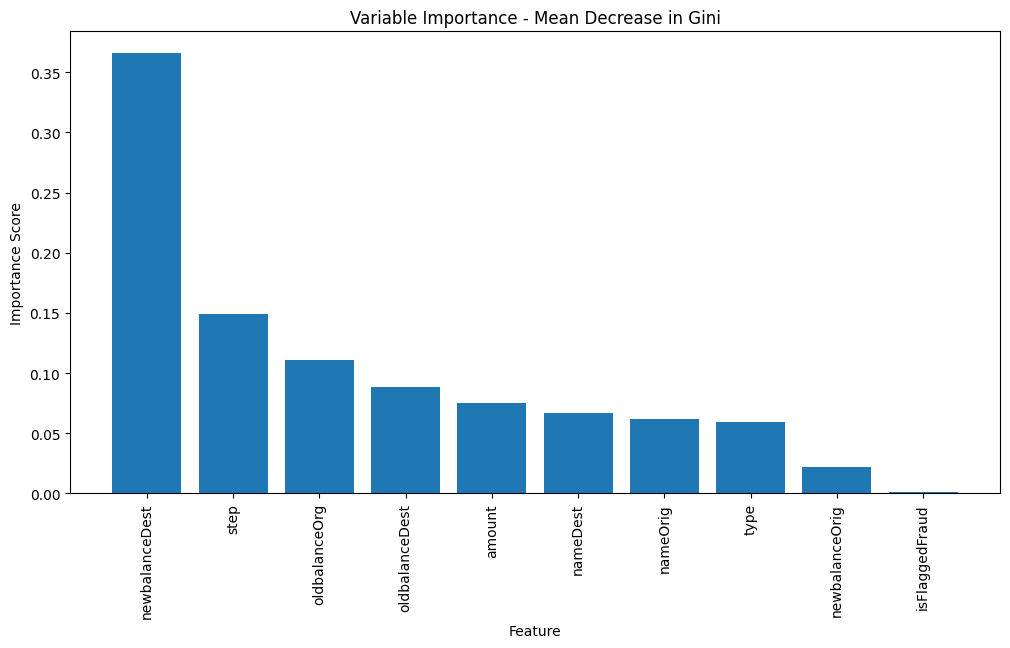

In [20]:
# Plot the variable importance scores
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importances)), feature_importances, align='center')
plt.xticks(range(len(feature_importances)), feature_names[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Variable Importance - Mean Decrease in Gini')

Text(0.5, 1.0, 'Cumulative Variable Importance - Mean Decrease in Gini')

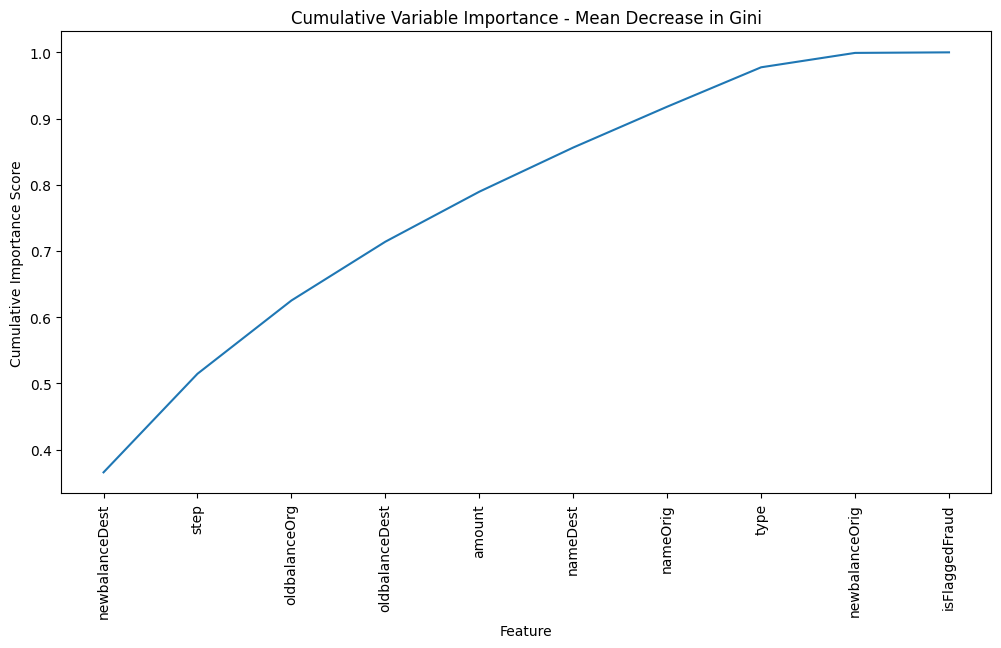

In [21]:
# Plot the cumulative importance scores
plt.figure(figsize=(12, 6))
plt.plot(range(len(feature_importances)), cumulative_importances)
plt.xticks(range(len(feature_importances)), feature_names[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Cumulative Importance Score')
plt.title('Cumulative Variable Importance - Mean Decrease in Gini')

In [22]:
# Calculate the mean decrease in accuracy for each feature
perm_importances = rfc.feature_importances_
perm_scores = []
for i in X_train.columns:
    X_train_perm = X_train.copy()
    X_train_perm[i] = np.random.permutation(X_train_perm[i])
    perm_score = rfc.score(X_train_perm, y_train)
    perm_scores.append(perm_score)
    
mean_decrease_accuracy = np.array(perm_scores) - rfc.score(X_train, y_train)

In [23]:
# Get the indices of the features in decreasing order of importance
indices = mean_decrease_accuracy.argsort()[::-1]

In [24]:
# Get the feature names and importance scores in two separate arrays
feature_names = X_train.columns
feature_importances = mean_decrease_accuracy[indices]

In [25]:
# Calculate the cumulative importance scores
cumulative_importances = np.cumsum(feature_importances)

Text(0.5, 1.0, 'Variable Importance - Mean Decrease in Accuracy')

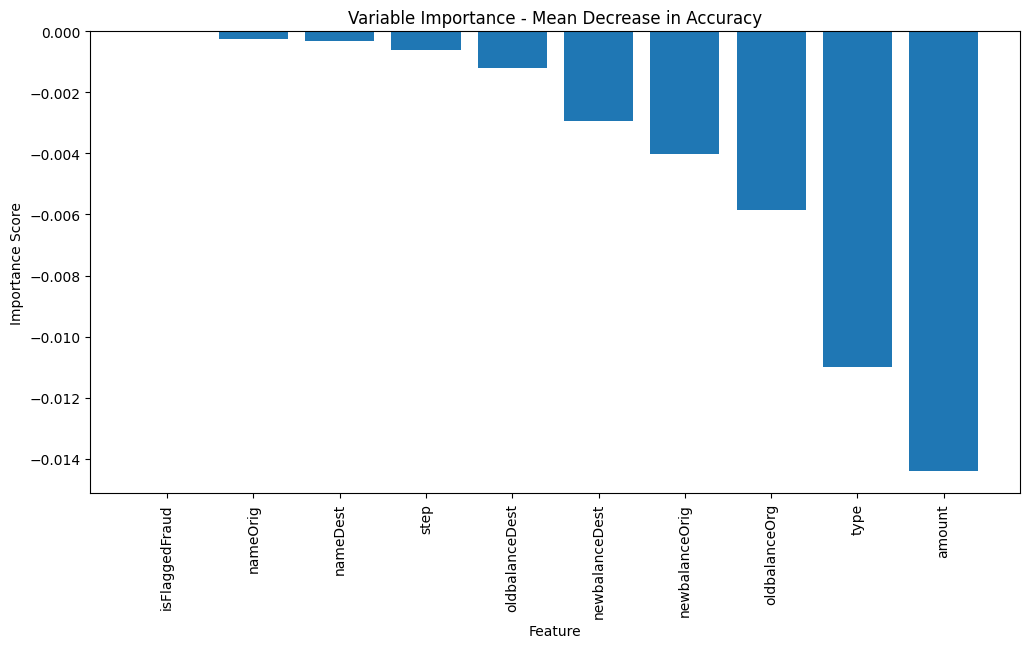

In [26]:
# Plot the variable importance scores
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importances)), feature_importances, align='center')
plt.xticks(range(len(feature_importances)), feature_names[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Variable Importance - Mean Decrease in Accuracy')

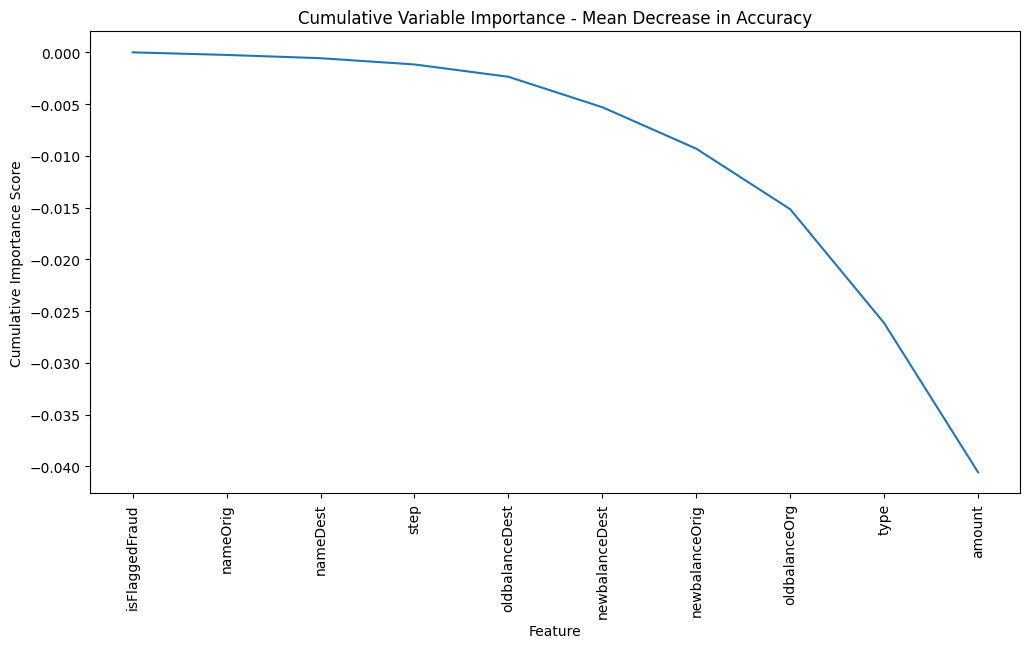

In [27]:
# Plot the cumulative importance scores
plt.figure(figsize=(12, 6))
plt.plot(range(len(feature_importances)), cumulative_importances)
plt.xticks(range(len(feature_importances)), feature_names[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Cumulative Importance Score')
plt.title('Cumulative Variable Importance - Mean Decrease in Accuracy')

plt.show()

## Once RF choses best features, use them to find hyperparameters

In [1]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define your X and y data using selected columns from X_train
X = X_train[['col1', 'col2', 'col3']]
y = y_train

# Create a parameter grid to search over
param_grid = {
    'learning_rate': [0.1, 0.3, 0.5],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 150],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Create GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X, y)

# Print the best parameters and mean cross-validation score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

NameError: name 'X_train' is not defined

## Train logistic regression  without hyperparameter tuning

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define the number of splits for stratified k-fold cross-validation
n_splits = 5

# Initialize stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize Logistic Regression classifier
lr = LogisticRegression()

train_scores = []
val_scores = []

# Loop over the folds in the cross-validation
for train_index, val_index in skf.split(X_train, y_train):
    
    # Split the data into training and validation sets for this fold
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Fit the logistic regression model on the training set for this fold
    lr.fit(X_train_fold, y_train_fold)

    # Predict on training set for this fold
    y_train_pred = lr.predict(X_train_fold)

    # Evaluate accuracy on training set for this fold
    train_acc = accuracy_score(y_train_fold, y_train_pred)

    # Predict on validation set for this fold
    y_val_pred = lr.predict(X_val_fold)

    # Evaluate accuracy on validation set for this fold
    val_acc = accuracy_score(y_val_fold, y_val_pred)

    # Append the scores to the lists
    train_scores.append(train_acc)
    val_scores.append(val_acc)

# Print average train and validation scores
print("Average training accuracy:", sum(train_scores) / n_splits)
print("Average validation accuracy:", sum(val_scores) / n_splits)

# Plot the train and validation scores for all folds
plt.plot(train_scores, label="Training scores")
plt.plot(val_scores, label="Validation scores")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Train and Validation Scores")
plt.legend()
plt.show()

# Check if the model is overfitting
if sum(val_scores) / n_splits < sum(train_scores) / n_splits:
    print("The model is overfitting.")
else:
    print("The model is not overfitting.")


## Train logistic regression  with hyperparameter tuning

# Concept 1- Feature selection using Mutual Information

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Select the top k features based on mutual information
k = 5
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X_train.columns[selected_feature_indices]

# Print the names of the selected features
print(selected_features)

# Random Forest Feature Selection

As we can see, there are hyperparameters which can be adjusted:
The RandomForestClassifier in scikit-learn has a number of hyperparameters that can be tuned to optimize model performance. Here are some of the most commonly used ones:
1. n_estimators
2.max_depth
3.min_samples_split
4.bootstrap
5.min_samples_leaf

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# instantiate the classifier with the desired hyperparameters
rfc = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features='auto', bootstrap=True, random_state=42)

In [ ]:
rfc.fit(X_train, y_train)

In [ ]:
importances = rfc.feature_importances_

In [ ]:
indices = np.argsort(importances)[::-1]

In [ ]:
plt.figure()
plt.title("Mean Decrease in Gini Importance")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
#plt.xticks(range(X_train.shape[1]), indices)
plt.xticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rfc, X_train, y_train, n_repeats=10, random_state=0)

plt.figure()
plt.title("Mean Decrease in Accuracy Importance")
plt.bar(range(X_train.shape[1]), result.importances_mean[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Concept 1- Recursive Feature Elimination (RFE)

For classification with small training samples and
high dimensionality, feature selection plays an
important role in avoiding overfitting problems and
improving classification performance.

In [ ]:
from sklearn.feature_selection import RFE
sel=RFE(RandomForestClassifier(n_estimators=10,random_state=18,n_jobs=-1),n_features_to_select=5)
sel.fit(X_train,y_train)

In [ ]:
sel.get_support()

In [ ]:
features = X_train.columns[sel.get_support()]

In [ ]:
features

In [ ]:
len(features)

# Concept 1 - Feature Selection by Gradient Boost Algorithm

# Feature Selection using ROC and AUC

In [ ]:
from sklearn.metrics import accuracy, roc_auc_score
from sklearn.feature_selection import Variancethreshold
from sklearn.ensemble import RandomForestClassifier

# Concept 2- Feature Extraction -> PCA

# Handle class imbalance during training using threshold moving algo

# Cost Sensitive Learning to handle class imbalance